# -> Capstone The Battle of Neighborhoods

## Table of Contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#Methodology)
* [Analysis](#analysis)
* [Result & Discussion](#Results)
* [Conclusion](#conclusion)

## Introduction
The aim of this project is to help stakeholders, who are interested in opening a **Mexican Restaurant** in **Toronto**, **Canada**, to find the optimal location to establish the Restaurant. 

There are several factors to be considered to open a restaurant such as: Customers, Staffing, Competition, Menu etc. One of the most important factors is finding the best **Location** to open a Mexican Restaurant. We need to consider places **aren't** crowded with restaurants. Specially we are looking for a place with **no** Mexican Restaurants in vicinity.

So we gonna use data science to analysis the Data of Toronto City. Also, we will use the Foursquare API to explore the neighborhoods.
Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.


## Data
In this project we will get our data from Wikipedia website. Here is the link <a>"https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"</a>. We will find in this link a table consisting of three columns (Postal Codes, Boroughs, Neighborhoods), this table is our data that we gonna use to analyze Toronto City. But what about Foursquare API?. How we gonna explore the neighborhoods without Geographical coordinates for each neighborhood?. Here is the link to download the latitude and longitude for each postal code https://cocl.us/Geospatial_data   

After getting the data we need, these data need preparation (Data Wrangling) to get rid of any unuseful information. Because after scraping the data from the website and converting it into pandas DataFrame, we will find a lot of missing data (Not Assigned) for certain neighborhoods, due to lack of record keeping.

In [2]:
%%capture cap --no-stderr

with open('output.txt', 'w') as f:
    f.write(cap.stdout)


In [3]:
conda install -c conda-forge geopy

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         394 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  ca-certificates                     2020.4.5.

First let's import all the libraries we need

In [4]:
import numpy as np #array oriented computing
import pandas as pd #data manipulation and analysis
import urllib.request #open URL
import json #to generate and parse JSON-format data
import pip #install and manage software packages written in Python
import requests #make a request to a web page
import folium #interactive leaflet map
from pandas.io.json import json_normalize #normalize semi-structured JSON data into a flat table
import matplotlib.cm as cm #builtin colormaps
import matplotlib.colors as colors #plots a list of the named colors supported in matplotlib
%matplotlib inline 
import matplotlib as mpl #customizing the properties and default styles of matplotlib
import matplotlib.pyplot as plt #collection of command style functions that make matplotlib work like MATLAB
from sklearn.cluster import KMeans #K-means clustering algorithm
from geopy.geocoders import Nominatim #to geolocate a query to an address and coordinates
from sklearn.preprocessing import StandardScaler #normalization

We will use a list of postal codes of Canada in Toronto City, we will find in the following link a table with three columns: Postal Codes, Borough , Neighborhood

In [5]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
page = urllib.request.urlopen(url)

here I defined a function to install packages 

In [6]:
if int(pip.__version__.split('.')[0])>9:
        from pip._internal import main
else:
        from pip import main
def install(package):
        main(['install', package])

install('BeautifulSoup4')
install ('html5lib')
install ('geopy')

Let's scrape the table we found in wikipedia web page using bs4

In [7]:
from bs4 import BeautifulSoup
Soup = BeautifulSoup(page, "html5lib")
all_tables=Soup.find_all("table")
right_table=Soup.find('table', class_='wikitable sortable')

I'm gonna make 3 lists to store the data from the table and create a dataframe

In [8]:
A=[]
B=[]
C=[]
for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))

df=pd.DataFrame(A,columns=['PostalCode'])
df['Borough'] = B
df['Neighborhood'] = C

We will find a lot of values as 'Not assigned' in the columns in our dataframe, so we will remove these values and make some adjustments

In [9]:
df.drop(df[df.Borough == 'Not assigned\n'].index, inplace=True)
df = df.replace('\n','', regex=True)
df = df.reset_index(drop = True)

In [10]:
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


The next step is to gain more info about Toronto City to know how many of Latin american people live in the Toronto's Neighborhoods.
I've used this link http://map.toronto.ca/wellbeing/#eyJ0b3Itd2lkZ2V0LWNsYXNzYnJlYWsiOsSAcGVyY2VudE9wYWNpdHnElzcwfSwiY3VzxIJtYcSTYcSXxIBuZWlnaGJvdXJob29kc8S2fcSrxIHEg8SFxIfEicSLdGFixYXEmCLEo3RpdmVUxZBJZMSXxYnEhMWPYi1pbmRpY2HEgnLFhcWIYWdzTWFwxLYiesWCbcSXMTTErHjEly04ODExMjU1LjA2MTUxxojErMSnOjU0Mzc1MzguxpTGkzPGk8WIxaTFpsWoxarFksSAxZjFq2lvbsSXMsSsc8WkZ2xlxbTErnLEk8SfVGltZcWcxKjErMWWxrjGoiI3xbTGnsWnxanEg8Wcc0HFpVfEucS7dMWSW8SAxIfFnjczIsSsd8eMaHTFucSsxJPGpHNlUG%2FEjnLEpcaPZmFsx6DEq8eRxZ06Ijk5x5Yix5jEuseax5wix57Em8egx6LHpMemxJfHqMeqZX1dxYfFiMa9Zcegx6XIicWGxKzGssa0dEnFpceExapNxYPGsMevxqxuxq7GsMWH

In [11]:
data_path = '/resources/data/TorontoPopulation.csv'
Toronto_Pop = pd.read_csv(data_path)
Toronto_Pop.drop(['Neighbourhood Id','Combined Indicators'], axis=1, inplace=True)
Toronto_Pop.rename(columns={'Neighbourhood': 'Neighborhood'}, inplace=True)
Toronto_Pop

,Neighborhood,Total Population,Latin American
0,West Humber-Clairville,33312.0,1300.0
1,Mount Olive-Silverstone-Jamestown,32954.0,1085.0
2,Thistletown-Beaumond Heights,10360.0,660.0
3,Rexdale-Kipling,10529.0,850.0
4,Elms-Old Rexdale,9456.0,765.0
...,...,...,...
135,West Hill,27392.0,555.0
136,Woburn,53485.0,745.0
137,Eglinton East,22776.0,400.0
138,Scarborough Village,16724.0,280.0


Of course to explore the neighborhoods, I need the coordinates of each neighborhoods. I've used this link https://cocl.us/Geospatial_data

In [12]:
df_geo = pd.read_csv("https://cocl.us/Geospatial_data")
df_geo

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


Here I start to merge the data together to get all I need in one dataframe

In [13]:
Df = pd.merge(df,df_geo,left_on='PostalCode', right_on='Postal Code')
Df

,PostalCode,Borough,Neighborhood,Postal Code,Latitude,Longitude
0,M3A,North York,Parkwoods,M3A,43.753259,-79.329656
1,M4A,North York,Victoria Village,M4A,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",M5A,43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",M6A,43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",M7A,43.662301,-79.389494
...,...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",M8X,43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,M4Y,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",M7Y,43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",M8Y,43.636258,-79.498509


In [14]:
df_new=Df.drop(['PostalCode'],axis=1)

In [15]:
df = pd.merge(df_new, Toronto_Pop, on='Neighborhood', how='left')
df

,Borough,Neighborhood,Postal Code,Latitude,Longitude,Total Population,Latin American
0,North York,Parkwoods,M3A,43.753259,-79.329656,NaN,NaN
1,North York,Victoria Village,M4A,43.725882,-79.315572,17510.0,430.0
2,Downtown Toronto,"Regent Park, Harbourfront",M5A,43.654260,-79.360636,NaN,NaN
3,North York,"Lawrence Manor, Lawrence Heights",M6A,43.718518,-79.464763,NaN,NaN
4,Downtown Toronto,"Queen's Park, Ontario Provincial Government",M7A,43.662301,-79.389494,NaN,NaN
...,...,...,...,...,...,...,...
98,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",M8X,43.653654,-79.506944,NaN,NaN
99,Downtown Toronto,Church and Wellesley,M4Y,43.665860,-79.383160,NaN,NaN
100,East Toronto,"Business reply mail Processing Centre, South C...",M7Y,43.662744,-79.321558,NaN,NaN
101,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",M8Y,43.636258,-79.498509,NaN,NaN


Remove the NAN values from our dataframe.

In [16]:
my_data=df.dropna(how='any', axis=0).reset_index(drop=True)

Here is my merged Dataframe

In [17]:
my_data

,Borough,Neighborhood,Postal Code,Latitude,Longitude,Total Population,Latin American
0,North York,Victoria Village,M4A,43.725882,-79.315572,17510.0,430.0
1,York,Humewood-Cedarvale,M6C,43.693781,-79.428191,14365.0,530.0
2,East Toronto,The Beaches,M4E,43.676357,-79.293031,21567.0,215.0
3,Scarborough,Woburn,M1G,43.770992,-79.216917,53485.0,745.0
4,North York,Hillcrest Village,M2H,43.803762,-79.363452,16934.0,220.0
5,East York,Thorncliffe Park,M4H,43.705369,-79.349372,21108.0,305.0
6,Scarborough,Scarborough Village,M1J,43.744734,-79.239476,16724.0,280.0
7,North York,Bayview Village,M2K,43.786947,-79.385975,21396.0,410.0
8,North York,Humber Summit,M9L,43.756303,-79.565963,12416.0,895.0
9,York,Weston,M9N,43.706876,-79.518188,17992.0,1390.0


Then we need to calculate the avergae value of latin American people in each Neighborhood and add it to my data

In [18]:
my_data['latin amer %']= my_data['   Latin American']/my_data['Total Population'] * 100
my_data

,Borough,Neighborhood,Postal Code,Latitude,Longitude,Total Population,Latin American,latin amer %
0,North York,Victoria Village,M4A,43.725882,-79.315572,17510.0,430.0,2.455740
1,York,Humewood-Cedarvale,M6C,43.693781,-79.428191,14365.0,530.0,3.689523
2,East Toronto,The Beaches,M4E,43.676357,-79.293031,21567.0,215.0,0.996893
3,Scarborough,Woburn,M1G,43.770992,-79.216917,53485.0,745.0,1.392914
4,North York,Hillcrest Village,M2H,43.803762,-79.363452,16934.0,220.0,1.299161
5,East York,Thorncliffe Park,M4H,43.705369,-79.349372,21108.0,305.0,1.444950
6,Scarborough,Scarborough Village,M1J,43.744734,-79.239476,16724.0,280.0,1.674241
7,North York,Bayview Village,M2K,43.786947,-79.385975,21396.0,410.0,1.916246
8,North York,Humber Summit,M9L,43.756303,-79.565963,12416.0,895.0,7.208441
9,York,Weston,M9N,43.706876,-79.518188,17992.0,1390.0,7.725656


Get the geograpical coordinate of Toronto City

In [19]:
address = 'Toronto, T.O'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


Let's visualize Toronto City and Neighborhoods using **Folium.Map**

In [20]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(my_data['Latitude'], my_data['Longitude'], my_data['Borough'], my_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Methodology
In this project we will direct our efforts on detecting areas of Toronto that have low restaurant density, particularly those with low number of Mexican restaurants.

In first step we have collected the required data: location of every Mexican restaurant in the neighborhoods where Latin American people live in.

Second step in our analysis will be calculation and exploration of 'mexican restaurant density' across different areas of Toronto - we will focus on areas where Latin American population are in general (and no Mexican restaurants in vicinity) and focus our attention on those areas.

In third and final step we will focus on most promising areas and within those create clusters of locations that meet some basic requirements established in discussion with stakeholders: we will take into consideration locations with High percentage of Latin American people and Low percentage of Mexican Restaurants. We will present map of all such locations.

To Use Foursquare API, I've to use my Client ID & Client Secret

In [21]:
CLIENT_ID = 'UJNHFKRFI52SVTYNFP03IHTF2NBEM2YLKUPFC1WIWHLYSSQU' 
CLIENT_SECRET = '1LXA0EE5KLMVDNRLH2AMM5UC1QUNX2BYBX00KRNVMV45DMRO' 
VERSION = '20180605' 

### Now, let's get the top 100 venues that are in each neighborhood where latin amreican people live in within a radius of 1000 meters.

In [22]:
LIMIT = 100 
radius = 1000 
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat, 
    lng, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=UJNHFKRFI52SVTYNFP03IHTF2NBEM2YLKUPFC1WIWHLYSSQU&client_secret=1LXA0EE5KLMVDNRLH2AMM5UC1QUNX2BYBX00KRNVMV45DMRO&v=20180605&ll=43.706876,-79.51818840000001&radius=1000&limit=100'

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
toronto_venues = getNearbyVenues(names=my_data['Neighborhood'],
                                   latitudes=my_data['Latitude'],
                                   longitudes=my_data['Longitude']
                                  )

Victoria Village
Humewood-Cedarvale
The Beaches
Woburn
Hillcrest Village
Thorncliffe Park
Scarborough Village
Bayview Village
Humber Summit
Weston


Now we know that there are 10 Neighborhoods crowd with latin american people who are demanding to eat and enjoy the mexican cuisines 

In [26]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bayview Village,14,14,14,14,14,14
Hillcrest Village,19,19,19,19,19,19
Humber Summit,10,10,10,10,10,10
Humewood-Cedarvale,29,29,29,29,29,29
Scarborough Village,12,12,12,12,12,12
The Beaches,79,79,79,79,79,79
Thorncliffe Park,52,52,52,52,52,52
Victoria Village,12,12,12,12,12,12
Weston,15,15,15,15,15,15


In [27]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 100 uniques categories.


Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [28]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Afghan Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,...,Sushi Restaurant,Tea Room,Thai Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Warehouse Store,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Calculate the percentage of Mexican Restaurants in our 10 Neighborhoods 

In [29]:
toronto_group = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_group = toronto_group[['Neighborhood', 'Mexican Restaurant']]
toronto_group.set_index('Neighborhood', inplace=True)
toronto_group

,Mexican Restaurant
Neighborhood,
Bayview Village,0.000000
Hillcrest Village,0.000000
Humber Summit,0.000000
Humewood-Cedarvale,0.034483
Scarborough Village,0.000000
The Beaches,0.012658
Thorncliffe Park,0.000000
Victoria Village,0.000000
Weston,0.000000


Let's visualise the percentage of Mexican Restaurants in each Neighborhoods using barplot 

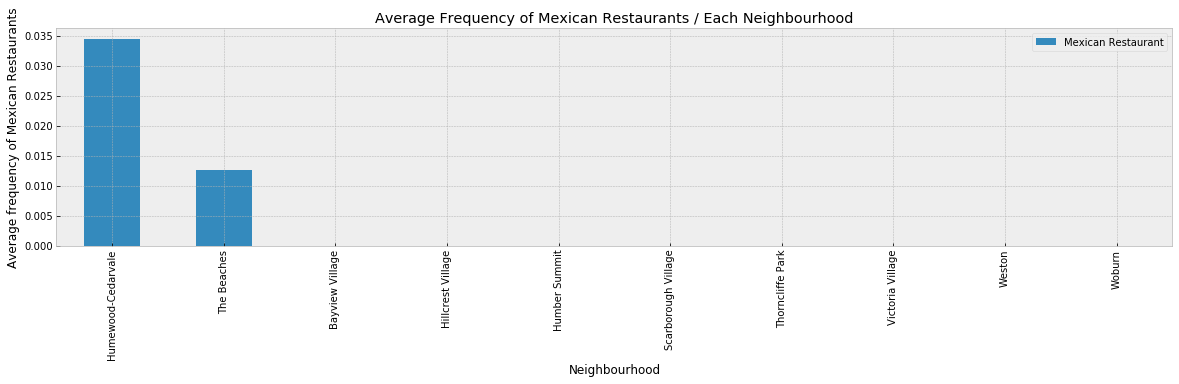

In [30]:
toronto_group.sort_values(by='Mexican Restaurant', ascending=False, inplace=True)
mpl.style.use('bmh')
toronto_group.plot(kind='bar', figsize=(20,4))
plt.title('Average Frequency of Mexican Restaurants / Each Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average frequency of Mexican Restaurants')
plt.show()

But what about the distribution of Latin American in Each Neighbourhood?

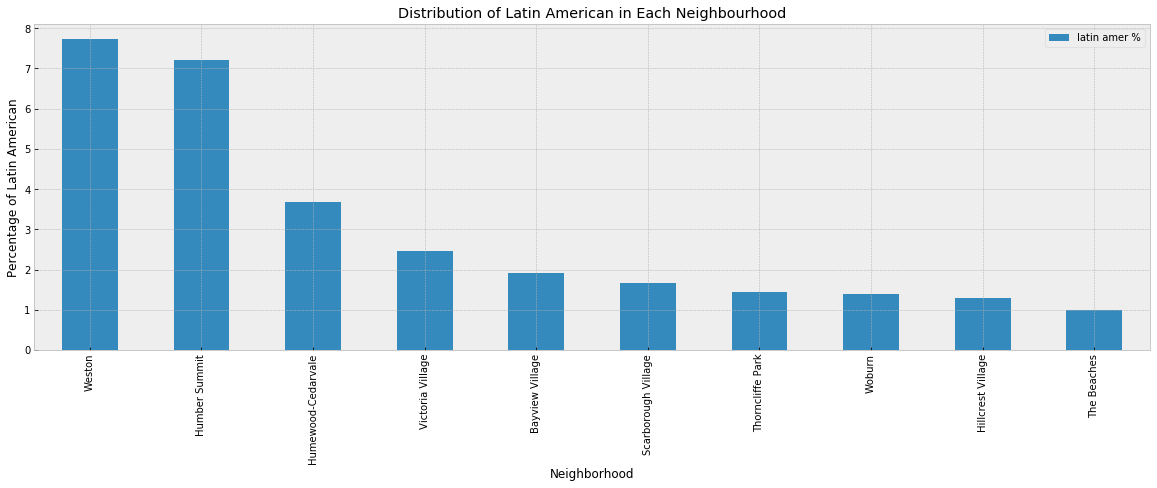

In [31]:
latin_pop = my_data[['Neighborhood', 'latin amer %']].set_index('Neighborhood')
latin_pop.sort_values(by='latin amer %', ascending=False, inplace=True)
latin_pop.plot(kind='bar', figsize=(20,6))
plt.title('Distribution of Latin American in Each Neighbourhood')
plt.xlabel('Neighborhood')
plt.ylabel('Percentage of Latin American')
plt.show()

Now let's merge all the information together in a final dataframe 

In [32]:
ultimo = pd.merge(my_data, toronto_group, on='Neighborhood')
ultimo

,Borough,Neighborhood,Postal Code,Latitude,Longitude,Total Population,Latin American,latin amer %,Mexican Restaurant
0,North York,Victoria Village,M4A,43.725882,-79.315572,17510.0,430.0,2.455740,0.000000
1,York,Humewood-Cedarvale,M6C,43.693781,-79.428191,14365.0,530.0,3.689523,0.034483
2,East Toronto,The Beaches,M4E,43.676357,-79.293031,21567.0,215.0,0.996893,0.012658
3,Scarborough,Woburn,M1G,43.770992,-79.216917,53485.0,745.0,1.392914,0.000000
4,North York,Hillcrest Village,M2H,43.803762,-79.363452,16934.0,220.0,1.299161,0.000000
5,East York,Thorncliffe Park,M4H,43.705369,-79.349372,21108.0,305.0,1.444950,0.000000
6,Scarborough,Scarborough Village,M1J,43.744734,-79.239476,16724.0,280.0,1.674241,0.000000
7,North York,Bayview Village,M2K,43.786947,-79.385975,21396.0,410.0,1.916246,0.000000
8,North York,Humber Summit,M9L,43.756303,-79.565963,12416.0,895.0,7.208441,0.000000
9,York,Weston,M9N,43.706876,-79.518188,17992.0,1390.0,7.725656,0.000000


In [33]:
Cluster_data = ultimo[['   Latin American','Mexican Restaurant']]
Cluster_data = StandardScaler().fit_transform(Cluster_data)
Cluster_data = pd.DataFrame(Cluster_data)
Cluster_data.rename(columns={0:'% Latin American', 1:'% Mexican Restaurants'}, inplace=True)
Cluster_data

,% Latin American,% Mexican Restaurants
0,-0.316726,-0.444042
1,-0.033935,2.804045
2,-0.924726,0.748294
3,0.574065,-0.444042
4,-0.910586,-0.444042
5,-0.670214,-0.444042
6,-0.740912,-0.444042
7,-0.373284,-0.444042
8,0.998251,-0.444042
9,2.398065,-0.444042


### Cluster Neighborhoods
Run k-means to cluster the neighborhood into 5 clusters.

In [34]:
# set number of clusters
kclusters = 5
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Cluster_data)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 4, 3, 0, 0, 0, 0, 3, 1], dtype=int32)

Let's create a new dataframe that includes the cluster for each neighborhood.

In [35]:
Cluster_data.drop(['% Latin American'], axis=1, inplace=True)
toronto_merged = pd.merge(my_data, Cluster_data, left_index=True, right_index=True)
toronto_merged.insert(0, 'Cluster Label', kmeans.labels_)
toronto_merged

,Cluster Label,Borough,Neighborhood,Postal Code,Latitude,Longitude,Total Population,Latin American,latin amer %,% Mexican Restaurants
0,0,North York,Victoria Village,M4A,43.725882,-79.315572,17510.0,430.0,2.455740,-0.444042
1,2,York,Humewood-Cedarvale,M6C,43.693781,-79.428191,14365.0,530.0,3.689523,2.804045
2,4,East Toronto,The Beaches,M4E,43.676357,-79.293031,21567.0,215.0,0.996893,0.748294
3,3,Scarborough,Woburn,M1G,43.770992,-79.216917,53485.0,745.0,1.392914,-0.444042
4,0,North York,Hillcrest Village,M2H,43.803762,-79.363452,16934.0,220.0,1.299161,-0.444042
5,0,East York,Thorncliffe Park,M4H,43.705369,-79.349372,21108.0,305.0,1.444950,-0.444042
6,0,Scarborough,Scarborough Village,M1J,43.744734,-79.239476,16724.0,280.0,1.674241,-0.444042
7,0,North York,Bayview Village,M2K,43.786947,-79.385975,21396.0,410.0,1.916246,-0.444042
8,3,North York,Humber Summit,M9L,43.756303,-79.565963,12416.0,895.0,7.208441,-0.444042
9,1,York,Weston,M9N,43.706876,-79.518188,17992.0,1390.0,7.725656,-0.444042


Finally, let's visualize the resulting clusters

In [36]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters

In [37]:
toronto_merged.loc[toronto_merged['Cluster Label'] == 0]

,Cluster Label,Borough,Neighborhood,Postal Code,Latitude,Longitude,Total Population,Latin American,latin amer %,% Mexican Restaurants
0,0,North York,Victoria Village,M4A,43.725882,-79.315572,17510.0,430.0,2.455740,-0.444042
4,0,North York,Hillcrest Village,M2H,43.803762,-79.363452,16934.0,220.0,1.299161,-0.444042
5,0,East York,Thorncliffe Park,M4H,43.705369,-79.349372,21108.0,305.0,1.444950,-0.444042
6,0,Scarborough,Scarborough Village,M1J,43.744734,-79.239476,16724.0,280.0,1.674241,-0.444042
7,0,North York,Bayview Village,M2K,43.786947,-79.385975,21396.0,410.0,1.916246,-0.444042


-MID percentage Of Latin People <br />
-LOW percentage Of Mexican Restaurants

In [38]:
toronto_merged.loc[toronto_merged['Cluster Label'] == 1]

,Cluster Label,Borough,Neighborhood,Postal Code,Latitude,Longitude,Total Population,Latin American,latin amer %,% Mexican Restaurants
9,1,York,Weston,M9N,43.706876,-79.518188,17992.0,1390.0,7.725656,-0.444042


-High percentage Of Latin People <br />
-LOW percentage Of Mexican Restaurants

In [39]:
toronto_merged.loc[toronto_merged['Cluster Label'] == 2]

,Cluster Label,Borough,Neighborhood,Postal Code,Latitude,Longitude,Total Population,Latin American,latin amer %,% Mexican Restaurants
1,2,York,Humewood-Cedarvale,M6C,43.693781,-79.428191,14365.0,530.0,3.689523,2.804045


-MID percentage Of Latin People <br />
-High percentage Of Mexican Restaurants

In [40]:
toronto_merged.loc[toronto_merged['Cluster Label'] == 3]

,Cluster Label,Borough,Neighborhood,Postal Code,Latitude,Longitude,Total Population,Latin American,latin amer %,% Mexican Restaurants
3,3,Scarborough,Woburn,M1G,43.770992,-79.216917,53485.0,745.0,1.392914,-0.444042
8,3,North York,Humber Summit,M9L,43.756303,-79.565963,12416.0,895.0,7.208441,-0.444042


-High percentage Of Latin People <br />
-LOW percentage Of Mexican Restaurants

In [41]:
toronto_merged.loc[toronto_merged['Cluster Label'] == 4]

,Cluster Label,Borough,Neighborhood,Postal Code,Latitude,Longitude,Total Population,Latin American,latin amer %,% Mexican Restaurants
2,4,East Toronto,The Beaches,M4E,43.676357,-79.293031,21567.0,215.0,0.996893,0.748294


-LOW percentage Of Latin People <br />
-LOW percentage Of Mexican Restaurants

### Conclusion
After all of the analysis above, we will come up with “Cluster Label” 1 is the best option we have.
The high population of Latin American people who most probably prefer to enjoy their cuisines such as Mexican food, and the very low number of Mexican restaurants in this neighborhood, will satisfy our goal from this project and the possibility of achieving the expected profits is very high.
So, I would suggest to our clients to consider “Weston” neighborhood as the optimal location to establish a new Mexican restaurants, but if our clients are seeking to expand a franchised restaurants, I would recommend “Cluster Label 3” cause it has two neighborhoods with a good percentage of Latin American like “Humber Summit” and “Woburn” neighborhoods.